check that numerical integration improves with the steps I implemented.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
from orbitflows.integrate import eulerstep, rungekutta4
from orbitflows import H_sho
from functools import partial

In [ ]:
def integrate(ps, steps, dt, stepfunc):
    """
    Integrate the system of particles using the Euler method.
    
    Parameters:
    ps (list): List of Particle objects.
    steps (int): Number of integration steps.
    dt (float): Time step for integration.
    
    Returns:
    None
    """
    ps_list = torch.zeros((steps + 1, 2))#, len(ps), 2))
    ps_list[0] = ps
    for i in range(steps):
        ps = stepfunc(ps, dt, partial(H_sho, omega=1.0))
        ps_list[i+1] = ps

    return ps_list

In [3]:
ps0 = torch.tensor([1.0, 0.0])

In [4]:
ps_euler = integrate(torch.tensor(ps0, requires_grad=True), 100, 0.1, eulerstep)
ps_rk4 = integrate(torch.tensor(ps0, requires_grad=True), 100, 0.1, rungekutta4)

/var/folders/s1/bxkg8f1501g2q16qjhch2_qw0000gn/T/ipykernel_24653/1724899892.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ps_euler = integrate(torch.tensor(ps0, requires_grad=True), 100, 0.1, eulerstep)

/var/folders/s1/bxkg8f1501g2q16qjhch2_qw0000gn/T/ipykernel_24653/1724899892.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ps_rk4 = integrate(torch.tensor(ps0, requires_grad=True), 100, 0.1, rungekutta4)



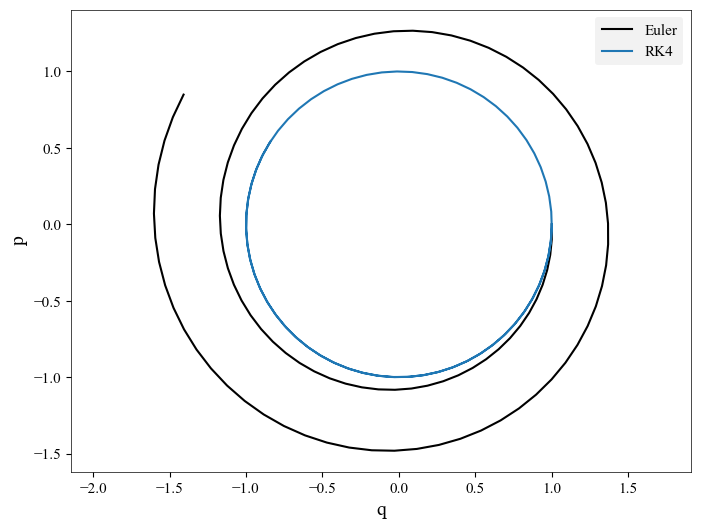

In [5]:
plt.plot(ps_euler[:, 0].detach().numpy(), ps_euler[:, 1].detach().numpy(), label='Euler')
plt.plot(ps_rk4[:, 0].detach().numpy(), ps_rk4[:, 1].detach().numpy(), label='RK4')
plt.axis('equal')
plt.xlabel('q', fontsize=14)
plt.ylabel('p', fontsize=14)
plt.legend()

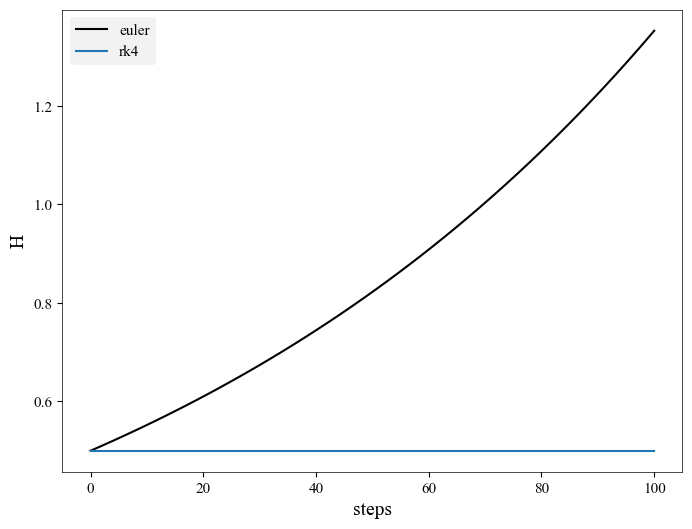

In [6]:
plt.plot(partial(H_sho, omega=1.0)(ps_euler).detach(), label='euler')
plt.plot(partial(H_sho, omega=1.0)(ps_rk4).detach(), label='rk4')
plt.xlabel('steps', fontsize=14)
plt.ylabel('H', fontsize=14)
plt.legend()